### Data Preparation for Bayesian Filter

install dependencies....

In [1]:
!pip install beautifulsoup4

In [2]:
!pip install wordcloud

In [3]:
#we are importing all the libraries we would like to use.
#including data stores for stopwords and such
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log, sqrt
import pandas as pd
import numpy as np
import os
import io
%matplotlib inline

### This function reads the files in the specified path.

In [4]:
def read_files(path):
    #this function is reading the actual email files.
    #the function will cycle through all the files in the folder specified.
    for root, dirnames, filenames in os.walk(path):
        for filename in filenames:
            path = os.path.join(root,filename)
            
            inBody = False
            lines = []
            #this uses IO functions to read the files by specifying the encoding type
            f = io.open(path, 'r', encoding = 'latin1')
            #this cycles through each line and fetches the text therein.
            for line in f:
                if inBody:
                    lines.append(line)
                elif line == '\n':
                    inBody = True
            f.close()
            #join the text into a single message.
            message = '\n'.join(lines)
            #return the message
            yield path, message
                    

### This function is for creating dataframes from the dataset in question... it also classifies the emails into either ham or spam

In [5]:
#this classifies the emails into spam or ham depending on predetermined status.
def dataFrameFromDirectory(path, classification):
    #instantiate the structure of the dataframe needed.
    rows = []
    index = []
    #store the message alongside its classification.
    for filename, message in read_files(path):
        rows.append({'message': message, 'label': classification})
        index.append(filename)
        #return the dataframe to be used for manipulation
    return pd.DataFrame(rows, index=index)

aggregate all the emails into a single dataframe. The key is: ham = 0, spam = 1

In [6]:
#fetch the data from the source files.
#here you run the datasets sequentially for validation by specifying file name. 

data = pd.DataFrame({'message':[],'label':[]})
data = data.append(dataFrameFromDirectory("datasets/ham3",0))
data = data.append(dataFrameFromDirectory("datasets/spam3",1))
data

,message,label
datasets/ham2/0762.4b7d2ad34203e8192af660707ba52ef5,"LOL you rool (:\n\n\n\nOn Sat, 21 Sep 2002, G...",0.0
datasets/ham2/0401.9ab0bcc81e70d6930acfefc2854a0172,">>>>> ""O"" == Owen Byrne <owen@permafrost.net> ...",0.0
datasets/ham2/0268.77ef28e27a9ee085646f260418072111,Inn Share <shareinnn@yahoo.com> writes:\n\n\n\...,0.0
datasets/ham2/0567.41bb1a0c6c8c5584844c6baa2612ede2,"On 8 Sep 2002 at 22:15, Geege Schuman wrote:\n...",0.0
datasets/ham2/1819.8e1547062c811ff9b62183ad65bf4ed6,[Tim]\n\n> ...\n\n> I'd prefer to strip HTML t...,0.0
...,...,...
datasets/spam2/0480.fc9323682825f7d93ed78a82970ceaea,Lowest rates available for term life insurance...,1.0
datasets/spam2/0498.863566df8e5f17f979edca79d1e87187,"<html>\n\n\n\n<head>\n\n<meta http-equiv=""Cont...",1.0
datasets/spam2/0210.285d263b1a18e67c68ec9fe005253dd0,<html>\n\n\n\n\n\n\n\n<body>\n\n\n\n<div align...,1.0
datasets/spam2/0197.6968d98720065059247cefe4e5bcd192,<html>\n\n<head>\n\n<title>Digital Publishing ...,1.0


The below cell shows the number of rows in our dataframe.

In [7]:
total_mails = data['message'].shape[0]
total_mails

660

The function below extracts all text from html text present in all emails.

In [8]:
#this is for scraping the emails, since most are in the form of html based content.
from bs4 import BeautifulSoup

def func(df):
    soup = BeautifulSoup(df['message'], "html.parser").find()
    #check emails with html syntax
    if bool(soup):
        soup = BeautifulSoup(df['message'], "html.parser")
        #extract text only from the whole email.
    
        text = soup.find_all(text=True)
      
        #return all the words found.
        text = ''.join(word for word in  text)
        df['message'] = text
        
        return text
    else:
        
        return df['message'] 

In [9]:
new_data = data.reset_index()
new_data

,index,message,label
0,datasets/ham2/0762.4b7d2ad34203e8192af660707ba...,"LOL you rool (:\n\n\n\nOn Sat, 21 Sep 2002, G...",0.0
1,datasets/ham2/0401.9ab0bcc81e70d6930acfefc2854...,">>>>> ""O"" == Owen Byrne <owen@permafrost.net> ...",0.0
2,datasets/ham2/0268.77ef28e27a9ee085646f2604180...,Inn Share <shareinnn@yahoo.com> writes:\n\n\n\...,0.0
3,datasets/ham2/0567.41bb1a0c6c8c5584844c6baa261...,"On 8 Sep 2002 at 22:15, Geege Schuman wrote:\n...",0.0
4,datasets/ham2/1819.8e1547062c811ff9b62183ad65b...,[Tim]\n\n> ...\n\n> I'd prefer to strip HTML t...,0.0
...,...,...,...
655,datasets/spam2/0480.fc9323682825f7d93ed78a8297...,Lowest rates available for term life insurance...,1.0
656,datasets/spam2/0498.863566df8e5f17f979edca79d1...,"<html>\n\n\n\n<head>\n\n<meta http-equiv=""Cont...",1.0
657,datasets/spam2/0210.285d263b1a18e67c68ec9fe005...,<html>\n\n\n\n\n\n\n\n<body>\n\n\n\n<div align...,1.0
658,datasets/spam2/0197.6968d98720065059247cefe4e5...,<html>\n\n<head>\n\n<title>Digital Publishing ...,1.0


In [10]:
#this removes all text that is not alphanumeric i.e special characters.
new_data[new_data['message'].str.isalnum()]

,index,message,label


split the data into the pareto principle for unbiased model testing.
so 80% will be used for training and 20% for testing.
this will be accomplished by using a random number generator to randomize the order by implementing a uniform distribution randomizer. this removes all chances of having a biased model on account of sequential data.

In [11]:
#split the data into training and testing sets
#initializing empty lists to hold training and testing data respectively
train_index, test_index = list(), list()
for i in range(data['message'].shape[0]):
    #make use of the uniform random distribution to alleviate contiguousness of pseudo-random number generators.
    #80% for training and 20% for testing according to the pareto principle.
    if np.random.uniform(0,1) < 0.80:
        train_index.append(i)
    else:
        test_index.append(i)
#training data dataframe.
train_data = new_data.loc[train_index]
#test data dataframe
test_data = new_data.loc[test_index]

implement the data cleaning of the html based messages
    

In [12]:
#here we  apply the scraping function to our data. hence cleaning it.
train_data['message'] = train_data.apply(func, axis=1)
test_data['message'] = test_data.apply(func, axis=1)
train_data #its just expecting the data to come from a website and not a dataframe.

,index,message,label
0,datasets/ham2/0762.4b7d2ad34203e8192af660707ba...,"LOL you rool (:\n\n\n\nOn Sat, 21 Sep 2002, G...",0.0
1,datasets/ham2/0401.9ab0bcc81e70d6930acfefc2854...,">>>>> ""O"" == Owen Byrne writes:\n\n\n\n O>...",0.0
3,datasets/ham2/0567.41bb1a0c6c8c5584844c6baa261...,"On 8 Sep 2002 at 22:15, Geege Schuman wrote:\n...",0.0
4,datasets/ham2/1819.8e1547062c811ff9b62183ad65b...,[Tim]\n\n> ...\n\n> I'd prefer to strip HTML t...,0.0
5,datasets/ham2/1894.feeadafed8d22fbefccef31f2a2...,\n\nForwarded-by: Nev Dull \n\nForwarded-by: n...,0.0
...,...,...,...
654,datasets/spam2/0088.f421d8c380fb0c48483f026d24...,=================================\n\n\n\nGuara...,1.0
655,datasets/spam2/0480.fc9323682825f7d93ed78a8297...,Lowest rates available for term life insurance...,1.0
656,datasets/spam2/0498.863566df8e5f17f979edca79d1...,\n\n\n\n\n\nAnswer-Us\n\n\n \n\n\n\n\n\n\n\n\n...,1.0
657,datasets/spam2/0210.285d263b1a18e67c68ec9fe005...,\n\n\n\n\n\nCopy\n\n ANY DVD with a CD-R ...,1.0


In [13]:
import re #regular expression. it is used to perform word searches.

train_data['message'] = train_data['message'].map(lambda x: re.sub(r'\W+', ' ', x))
test_data['message'] = test_data['message'].map(lambda x: re.sub(r'\W+', ' ', x))

In [14]:
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

In [15]:
train_data['message'].str.isalnum()

0      False
1      False
2      False
3      False
4      False
       ...  
532    False
533    False
534    False
535    False
536    False
Name: message, Length: 537, dtype: bool

In [16]:
test_data

,index,message,label
0,datasets/ham2/0268.77ef28e27a9ee085646f2604180...,Inn Share writes Hi all Does anyone know how t...,0.0
1,datasets/ham2/2408.9d2e0a6592738da2aad3f0657d4...,URL http boingboing net 85528553 Date Not supp...,0.0
2,datasets/ham2/2164.1a46ee8b5542d762cb2f364fe48...,URL http www aaronsw com weblog 000619 Date 20...,0.0
3,datasets/ham2/0906.2e604cc2a15e9f2a68c302861ac...,That s what the manual said a diversity antenn...,0.0
4,datasets/ham2/0473.c16661c43da07d0a3a9baaca5e1...,On Tue 3 Sep 2002 Kragen Sitaker wrote Of cour...,0.0
...,...,...,...
118,datasets/spam2/0485.9021367278833179285091e520...,Congratulations You Get a Free Handheld Organ...,1.0
119,datasets/spam2/0157.3f95804da86ee79dbb076c47ed...,New Web Technology UNLIMITED WEB CON FERENCING...,1.0
120,datasets/spam2/0117.33011fddf61efe5f453a14468f...,Wanna see sexually curious teens playing with ...,1.0
121,datasets/spam2/0214.b5ba0ff48cee07a36c6f312de7...,Dear user CyberAge Dating Club is contacting y...,1.0


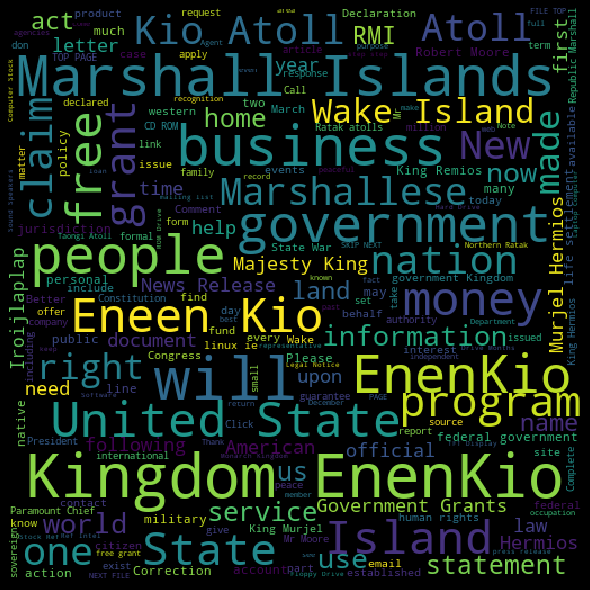

In [17]:
#visual representation of the most salient words.
#this is the visulization for the spam.
spam_words = ' '.join(str(moja) for moja in list(test_data[test_data['label'] == 1]['message']))
spamwc = WordCloud(width = 512, height=512).generate(spam_words)
plt.figure(figsize=(10,8), facecolor='k')
plt.imshow(spamwc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

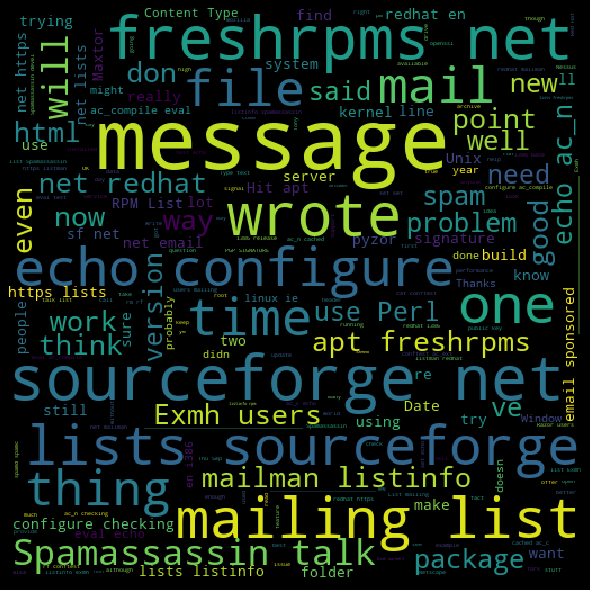

In [18]:
#Visualize the ham data
spam_words = ' '.join(str(moja) for moja in list(test_data[test_data['label'] == 0]['message']))
spamwc = WordCloud(width = 512, height=512).generate(spam_words)
plt.figure(figsize=(10,8), facecolor='k')
plt.imshow(spamwc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

distribution by value

In [19]:
train_data['label'].value_counts() #remove the paragraph line

0.0    450
1.0     87
Name: label, dtype: int64

In [20]:
#tokenizing and processing the words harnessed.
def process_message(message, lower_case = True, stem = True, stop_words = True, gram = 2):
    #lower case all the letters in the message.
    if lower_case:
        message = message.lower()
    #break down the words into tokens.
    words = word_tokenize(message)
    words = [w for w in words if len(w) > 2]
#     print(words)
    if gram > 1:
        w = []
        for i in range(len(words) - gram + 1):
            w += [' '.join(words[i:i + gram])]
        return w
    if stop_words:
        #fetch all words that do not have meaning in this case: stopwords.
        sw = stopwords.words('english')
        #create a list of words containing only the words without stopwords
        words = [word for word in words if word not in sw]
    if stem:
        stemmer = PorterStemmer()
        words = [stemmer.stem(word) for word in words]   
#     print(words)
    return words

In [21]:
train_data.columns

Index(['index', 'message', 'label'], dtype='object')

In [22]:
#this whole function is the bayesian classifier. the calc_prob calculates the probability of a word bein either spam or ham.
#the classify function returns true if the threshold for it being spam has been reached. otherwise, it is false, meaning ham.
class SpamClassifier(object):
    def __init__(self, train_data, method = 'tf-idf'):
        #initialize the data to be used for processing. i.e training data.
        self.mails, self.labels = train_data['message'], train_data['label']
        self.method = method

    def train(self):
        #this function trains our model.
        self.calc_TF_and_IDF()
        if self.method == 'tf-idf':
            self.calc_TF_IDF()
        else:
            self.calc_prob()

    def calc_prob(self):
        # initialize variables to calculate probabilities. i.e probability of being ham or spam. using normal probabilistic theory.
        self.prob_spam = dict()
        self.prob_ham = dict()
        for word in self.tf_spam:
            #if word is spam create a dictionary with the key being the word and the value being the probability of it being spam.
            self.prob_spam[word] = (self.tf_spam[word] + 1) / (self.spam_words + \
                                                                len(list(self.tf_spam.keys())))
        for word in self.tf_ham:
            #if word is ham, create a dictionary with the key being the ham word and the value being its probability of being ham.
            self.prob_ham[word] = (self.tf_ham[word] + 1) / (self.ham_words + \
                                                                len(list(self.tf_ham.keys())))
        self.prob_spam_mail, self.prob_ham_mail = self.spam_mails / self.total_mails, self.ham_mails / self.total_mails 


    def calc_TF_and_IDF(self):
        noOfMessages = self.mails.shape[0]
        self.spam_mails, self.ham_mails = self.labels.value_counts()[1], self.labels.value_counts()[0]
        self.total_mails = self.spam_mails + self.ham_mails
        self.spam_words = 0
        self.ham_words = 0
        self.tf_spam = dict()
        self.tf_ham = dict()
        self.idf_spam = dict()
        self.idf_ham = dict()
        self.missing_index = [number for number in range(0,noOfMessages) if number not in self.mails.index ]
        for i in range(noOfMessages):
            if i not in self.missing_index:
                message_processed = process_message(self.mails[i])
                count = list() #To keep track of whether the word has ocured in the message or not.
                               #For IDF
                for word in message_processed:
                    if self.labels[i]:
                        self.tf_spam[word] = self.tf_spam.get(word, 0) + 1
                        self.spam_words += 1
                    else:
                        self.tf_ham[word] = self.tf_ham.get(word, 0) + 1
                        self.ham_words += 1
                    if word not in count:
                        count += [word]
                for word in count:
                    if self.labels[i]:
                        self.idf_spam[word] = self.idf_spam.get(word, 0) + 1
                    else:
                        self.idf_ham[word] = self.idf_ham.get(word, 0) + 1

    def calc_TF_IDF(self):
        self.prob_spam = dict()
        self.prob_ham = dict()
        self.sum_tf_idf_spam = 0
        self.sum_tf_idf_ham = 0
        for word in self.tf_spam:
            self.prob_spam[word] = (self.tf_spam[word]) * log((self.spam_mails + self.ham_mails) \
                                                          / (self.idf_spam[word] + self.idf_ham.get(word, 0)))
            self.sum_tf_idf_spam += self.prob_spam[word]
        for word in self.tf_spam:
            self.prob_spam[word] = (self.prob_spam[word] + 1) / (self.sum_tf_idf_spam + len(list(self.prob_spam.keys())))
            
        for word in self.tf_ham:
            self.prob_ham[word] = (self.tf_ham[word]) * log((self.spam_mails + self.ham_mails) \
                                                          / (self.idf_spam.get(word, 0) + self.idf_ham[word]))
            self.sum_tf_idf_ham += self.prob_ham[word]
        for word in self.tf_ham:
            self.prob_ham[word] = (self.prob_ham[word] + 1) / (self.sum_tf_idf_ham + len(list(self.prob_ham.keys())))
            
    
        self.prob_spam_mail, self.prob_ham_mail = self.spam_mails / self.total_mails, self.ham_mails / self.total_mails 
       #the method that does the actual classifying.             
    def classify(self, processed_message):
        pSpam, pHam = 0, 0
        for word in processed_message:                
            if word in self.prob_spam:
                pSpam += log(self.prob_spam[word])
            else:
                try:
                    if self.method == 'tf-idf':
                        pSpam -= log(self.sum_tf_idf_spam + len(list(self.prob_spam.keys())))
                    else:
                        pSpam -= log(self.spam_words + len(list(self.prob_spam.keys())))
                except:
                    print('oops')
            if word in self.prob_ham:
                pHam += log(self.prob_ham[word])
            else:
                try:
                    if self.method == 'tf-idf':
                        pHam -= log(self.sum_tf_idf_ham + len(list(self.prob_ham.keys()))) 
                    else:
                        pHam -= log(self.ham_words + len(list(self.prob_ham.keys())))
                except:
                    print('oops')
            pSpam += log(self.prob_spam_mail)
            pHam += log(self.prob_ham_mail)
            #if probability of spam is higher, it returns true.
            return pSpam >= pHam
    
    def predict(self, testData):
        result = dict()
        for (i, message) in enumerate(testData):
            processed_message = process_message(message)
        
            result[i] = int(self.classify(processed_message))
        return result

In [23]:
def metrics(labels, predictions): #Confusion matrix function
    true_pos, true_neg, false_pos, false_neg = 0, 0, 0, 0
    for i in range(len(labels)):
        true_pos += int(labels[i] == 1 and predictions[i] == 1)
        true_neg += int(labels[i] == 0 and predictions[i] == 0)
        false_pos += int(labels[i] == 0 and predictions[i] == 1)
        false_neg += int(labels[i] == 1 and predictions[i] == 0)
    precision = true_pos / (true_pos + false_pos)
    recall = true_pos / (true_pos + false_neg)
    Fscore = 2 * precision * recall / (precision + recall)
    accuracy = (true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg)

    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F-score: ", Fscore)
    print("Accuracy: ", accuracy)

In [24]:
#this checks for the metrics based on the bag of words method
sc_bow = SpamClassifier(train_data, 'bow') 
sc_bow.train()
preds_bow = sc_bow.predict(test_data['message'])
metrics(test_data['label'], preds_bow)

Precision:  0.8
Recall:  0.34782608695652173
F-score:  0.48484848484848486
Accuracy:  0.8617886178861789


In [25]:
#this checks for the metrics based on tf-idf method
sc_tf_idf = SpamClassifier(train_data, 'tf-idf')
sc_tf_idf.train()
preds_tf_idf = sc_tf_idf.predict(test_data['message'])
metrics(test_data['label'], preds_tf_idf) 

Precision:  0.8
Recall:  0.34782608695652173
F-score:  0.48484848484848486
Accuracy:  0.8617886178861789


In [26]:
pm = process_message("No, this isn't a reference for the website which you used. Your reference implies that you are paraphrasing information from the actual article which clearly you are not doing.")
if(sc_tf_idf.classify(pm)):
    print("Message is spam")
else:
    print("Message is Ham")

Message is Ham
